# StakingReport( )

### Desafio: Criar uma aumotação para colher os dados de Staking de 3 plataformas:
- CoinmarketCap
- PancakeSwap
- Binance Staking
### Gerar Relatórios
- diário
- semanal
- mensal

In [ ]:
# Acessar páginas de staking
# Raspar dados
# Tratar os dados
# Criar dataframe
# Enviar relatório

### Primeira tentativa:
- Função scrapp() com função .text()
- Mesmo método para 3 plataformas

In [14]:
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
import pandas as pd

servico = Service(ChromeDriverManager().install())
chrome_options = webdriver.ChromeOptions()
prefs = {"profile.default_content_setting_values.notifications": 2} # Desativar as Notificações do Chrome
chrome_options.add_experimental_option("prefs", prefs)
chrome_options.add_argument("--headless")  # Executar em modo headless
navegador = webdriver.Chrome(service=servico, options=chrome_options)
wait = WebDriverWait(navegador, 10)

def scrapp(url, exchange):
    navegador.get(url)
    
    # Aguarde a presença do elemento na página
    tabela_exchange = wait.until(EC.presence_of_element_located((By.XPATH, elemento)))
    tabela_exchange = tabela_exchange.text
    
    linhas_exchange = tabela_exchange.split('\n')
    dados_exchange = [linha.split() for linha in linhas_exchange]
    
    # Crie o nome do DataFrame com base no nome da exchange
    nome_df = "df_" + exchange
    
    # Crie o DataFrame correspondente
    globals()[nome_df] = pd.DataFrame(dados_exchange)
    
    print(f"{'*' * 30} {exchange} {'*' * 30}")
    print(globals()[nome_df])


# Lista Coinmarket
url_coinmarket = "https://coinmarketcap.com/pt-br/view/staking/"
elemento_coinmarket = '//*[@id="__next"]/div[2]/div[1]/div[2]/div/div[1]/div[2]/table/tbody'
exchange_coinmarket = "coinmarket"

# Lista Pancakeswap
url_pancakeswap = "https://pancakeswap.finance/pools"
elemento_pancakeswap = '//*[@id="pools-table"]'
exchange_pancakeswap = "pancakeswap"

# Lista Binance
url_binance = "https://www.binance.com/pt-BR/earn"
elemento_binance = '//*[@id="__APP"]/div[3]/div[5]/div/div[4]/div[1]'
exchange_binance = "binance"

exchanges = [
    (url_coinmarket, elemento_coinmarket, exchange_coinmarket),
    (url_pancakeswap, elemento_pancakeswap, exchange_pancakeswap),
    (url_binance, elemento_binance, exchange_binance)
]

# for url, elemento, exchange in exchanges:
#     scrapp(url, exchange)
    
# navegador.quit()
print("\U0001F600")

[WDM] - Downloading: 100%|████████████████████████████████████████████████████████| 6.30M/6.30M [00:01<00:00, 5.45MB/s]


😀









[WDM] - Downloading:  89%|█████████████████████████████████████████████████▌      | 5.58M/6.30M [00:17<00:00, 5.24MB/s]

# Função Coinmarket
#### Ao perceber que a logica de pegar linha a linha da tabela não estava trazendo os dados de forma minimamente organizada pra tratamento: 
    - Inspecionei a pagina e identifiquei o elemento do cabeçalho, linhas, colunas e imagens;
    - Como estratégia vou indicar quais elementos pegar da linha e criar um loop para as demais linhas

In [15]:
import requests
from bs4 import BeautifulSoup

# Faz a requisição HTTP para obter o conteúdo da página
url = url_coinmarket
response = requests.get(url)

# Cria um objeto BeautifulSoup com o conteúdo HTML da página
soup = BeautifulSoup(response.content, "html.parser")

# Encontre o cabeçalho da tabela
cabecalho = soup.find("thead")
linhas_cabecalho = cabecalho.find_all("tr")

# Extrai os elementos do cabeçalho
elementos_cabecalho = []
for linha in linhas_cabecalho:
    colunas_cabecalho = linha.find_all("th")
    for coluna in colunas_cabecalho:
        elementos_cabecalho.append(coluna.get_text())

# Encontre a tabela ou o elemento que contém os dados que você deseja extrair
tabela = soup.find("tbody")
linhas_tabela = tabela.find_all("tr")

# Armazena os dados em uma lista de dicionários
dados = []
for linha in linhas_tabela:
    # Obtém as colunas (elementos td) da linha
    colunas = linha.find_all("td")
    
    # Cria um dicionário para armazenar os dados da linha
    linha_dados = {}
    
    # Extrai o conteúdo de cada coluna e associa com o elemento do cabeçalho correspondente
    for i, coluna in enumerate(colunas):
        # Verifique se há um elemento correspondente no cabeçalho antes de extrair o conteúdo
        if i < len(elementos_cabecalho):
            cabecalho_coluna = elementos_cabecalho[i]
            linha_dados[cabecalho_coluna] = coluna.get_text()
    
    # Adiciona a linha de dados à lista de dados
    dados.append(linha_dados)

# Imprime os dados armazenados
for linha_dados in dados:
    for chave, valor in linha_dados.items():
        print(f"{chave}: {valor}")
    print()


: 
#: 7
Nome: CardanoADA
Preço: R$1.37
1h %: 0.07%
24h %: 6.15%
7d %: 6.67%
Cap. de Mercado: R$47.85BR$47,847,926,607
Volume(24h): R$2,450,768,3471,789,916,580 ADA
Fornecimento Circulante: 34,945,692,555 ADA
Últimos 7 Dias: 

: 
#: 39
Nome: NEAR ProtocolNEAR
Preço: R$6.54
1h %: 0.09%
24h %: 3.30%
7d %: 4.41%
Cap. de Mercado: R$6.06BR$6,062,402,918
Volume(24h): R$499,810,03476,387,400 NEAR
Fornecimento Circulante: 926,534,410 NEAR
Últimos 7 Dias: 

: 
#: 69
Nome: ConfluxCFX
Preço: R$0.9638
1h %: 0.35%
24h %: 2.29%
7d %: 24.30%
Cap. de Mercado: R$2.87BR$2,871,096,164
Volume(24h): R$704,678,965731,167,599 CFX
Fornecimento Circulante: 2,979,019,656 CFX
Últimos 7 Dias: 

: 
#: 72
Nome: FlowFLOW
Preço: R$2.59
1h %: 0.39%
24h %: 6.80%
7d %: 3.66%
Cap. de Mercado: R$2.69BR$2,688,741,441
Volume(24h): R$216,714,81983,518,590 FLOW
Fornecimento Circulante: 1,036,200,000 FLOW
Últimos 7 Dias: 

: 
#: 82
Nome: BitTorrent(New)BTT
Preço: R$0.0...02278
1h %: 0.18%
24h %: 3.82%
7d %: 2.82%
Cap. de Mercad

### 2ª Tentativa incluíndo pegando as imagens dessa vez

In [16]:
import requests
from bs4 import BeautifulSoup

# Faz a requisição HTTP para obter o conteúdo da página
url = url_coinmarket
response = requests.get(url)

# Cria um objeto BeautifulSoup com o conteúdo HTML da página
soup = BeautifulSoup(response.content, "html.parser")

# Encontre o cabeçalho da tabela
cabecalho = soup.find("thead")
linhas_cabecalho = cabecalho.find_all("tr")

# Extrai os elementos do cabeçalho
elementos_cabecalho = []
for linha in linhas_cabecalho:
    colunas_cabecalho = linha.find_all("th")
    for coluna in colunas_cabecalho:
        elementos_cabecalho.append(coluna.get_text())

# Encontre a tabela ou o elemento que contém os dados que você deseja extrair
tabela = soup.find("tbody")
linhas_tabela = tabela.find_all("tr")

# Armazena os dados em uma lista de dicionários
dados = []
for linha in linhas_tabela:
    # Obtém as colunas (elementos td) da linha
    colunas = linha.find_all("td")
    
    # Cria um dicionário para armazenar os dados da linha
    linha_dados = {}
    
    # Extrai o conteúdo de cada coluna e associa com o elemento do cabeçalho correspondente
    for i, coluna in enumerate(colunas):
        # Verifique se há um elemento correspondente no cabeçalho antes de extrair o conteúdo
        if i < len(elementos_cabecalho):
            cabecalho_coluna = elementos_cabecalho[i]
            
            # Verifica se a coluna contém uma imagem
            imagem = coluna.find("img")
            if imagem:
                # Obtém a URL da imagem
                url_imagem = imagem["src"]
                
                # Armazena a URL da imagem no dicionário
                linha_dados[cabecalho_coluna] = url_imagem
            else:
                # Armazena o texto da coluna no dicionário
                linha_dados[cabecalho_coluna] = coluna.get_text()
    
    # Adiciona a linha de dados à lista de dados
    dados.append(linha_dados)

# Imprime os dados armazenados
for linha_dados in dados:
    for chave, valor in linha_dados.items():
        print(f"{chave}: {valor}")
    print()

: 
#: 7
Nome: https://s2.coinmarketcap.com/static/img/coins/64x64/2010.png
Preço: R$1.37
1h %: 0.07%
24h %: 6.15%
7d %: 6.67%
Cap. de Mercado: R$47.85BR$47,847,926,607
Volume(24h): R$2,450,768,3471,789,916,580 ADA
Fornecimento Circulante: 34,945,692,555 ADA
Últimos 7 Dias: https://s3.coinmarketcap.com/generated/sparklines/web/7d/2781/2010.svg

: 
#: 39
Nome: https://s2.coinmarketcap.com/static/img/coins/64x64/6535.png
Preço: R$6.54
1h %: 0.09%
24h %: 3.30%
7d %: 4.41%
Cap. de Mercado: R$6.06BR$6,062,402,918
Volume(24h): R$499,810,03476,387,400 NEAR
Fornecimento Circulante: 926,534,410 NEAR
Últimos 7 Dias: https://s3.coinmarketcap.com/generated/sparklines/web/7d/2781/6535.svg

: 
#: 69
Nome: https://s2.coinmarketcap.com/static/img/coins/64x64/7334.png
Preço: R$0.9638
1h %: 0.35%
24h %: 2.29%
7d %: 24.30%
Cap. de Mercado: R$2.87BR$2,871,096,164
Volume(24h): R$704,678,965731,167,599 CFX
Fornecimento Circulante: 2,979,019,656 CFX
Últimos 7 Dias: https://s3.coinmarketcap.com/generated/spark

### Exportar para Dataframe e Excel para análise visual da estrutura dos dados

In [17]:
# Cria o DataFrame com base nos dados extraídos
df = pd.DataFrame(dados)

# Imprime o DataFrame
print(df)

        #                                               Nome          Preço  \
0       7  https://s2.coinmarketcap.com/static/img/coins/...         R$1.37   
1      39  https://s2.coinmarketcap.com/static/img/coins/...         R$6.54   
2      69  https://s2.coinmarketcap.com/static/img/coins/...       R$0.9638   
3      72  https://s2.coinmarketcap.com/static/img/coins/...         R$2.59   
4      82  https://s2.coinmarketcap.com/static/img/coins/...  R$0.0...02278   
.. ..  ..                                                ...            ...   
95                                        Tadpole FinanceTAD          $4.20   
96                                      Delphi Chain LinkDCL          $0.00   
97                                        FEG Token [OLD]FEG          $0.00   
98                                       The SmokehouseSMOKE          $0.00   
99                                    Kimochi FinanceKIMOCHI          $0.00   

     1h %  24h %    7d %           Cap. de Mercado 

In [45]:
# Salva o DataFrame em um arquivo Excel
nome_arquivo = "staking_report_coinbase.xlsx"
df.to_excel(nome_arquivo, index=False)

print(f"Dados salvos no arquivo '{nome_arquivo}'")

Dados salvos no arquivo 'staking_report_coinbase.xlsx'


### 3ª Tentativa Criar toda estrutura da tabela
#### Abordagem linha/linha, coluna/coluna

In [ ]:
# Identificar o elemento do cabeçalho
# Identificar o elemento cada item do cabeçalho
# Identificar o elemento da linha
# Identificar o elemento de cada item da linha
# Criar uma tabela vazia com as colunas finais
# Indicar quais colunas irão receber quais elementos
# Criar um loop para iterar todas as linhas

In [ ]:
# Elementos do Cabeçalho
//*[@id="__next"]/div[2]/div[1]/div[2]/div/div[1]/div[2]/table/thead/tr

# Itens do Cabeçalho
# Serão as colunas da tabela
"Numero" = //*[@id="__next"]/div[2]/div[1]/div[2]/div/div[1]/div[2]/table/thead/tr/th[2]
"Logo" = # será preenchido pela imagens
"Nome" = //*[@id="__next"]/div[2]/div[1]/div[2]/div/div[1]/div[2]/table/thead/tr/th[3]
"Preço" = //*[@id="__next"]/div[2]/div[1]/div[2]/div/div[1]/div[2]/table/thead/tr/th[4]
"1h %" = //*[@id="__next"]/div[2]/div[1]/div[2]/div/div[1]/div[2]/table/thead/tr/th[5]
"24h %" = //*[@id="__next"]/div[2]/div[1]/div[2]/div/div[1]/div[2]/table/thead/tr/th[6]
"7d %" = //*[@id="__next"]/div[2]/div[1]/div[2]/div/div[1]/div[2]/table/thead/tr/th[7]
"Cap. de Mercado" = //*[@id="__next"]/div[2]/div[1]/div[2]/div/div[1]/div[2]/table/thead/tr/th[8]
"Volume (24h)" = //*[@id="__next"]/div[2]/div[1]/div[2]/div/div[1]/div[2]/table/thead/tr/th[9]
"Variação" = //*[@id="__next"]/div[2]/div[1]/div[2]/div/div[1]/div[2]/table/thead/tr/th[11]

# Elemento da 1ª linha
//*[@id="__next"]/div[2]/div[1]/div[2]/div/div[1]/div[2]/table/tbody/tr[1]

# Itens da 1ª Linha
"Numero" = //*[@id="__next"]/div[2]/div[1]/div[2]/div/div[1]/div[2]/table/tbody/tr[1]/td[2]
"Logo" = //*[@id="__next"]/div[2]/div[1]/div[2]/div/div[1]/div[2]/table/tbody/tr[1]/td[3]/div/a/div/img
"Nome" = //*[@id="__next"]/div[2]/div[1]/div[2]/div/div[1]/div[2]/table/tbody/tr[1]/td[3]/div/a/div/div/p
"Preço" = //*[@id="__next"]/div[2]/div[1]/div[2]/div/div[1]/div[2]/table/tbody/tr[1]/td[4]/div/a/span
"1h %" = //*[@id="__next"]/div[2]/div[1]/div[2]/div/div[1]/div[2]/table/tbody/tr[1]/td[5]/span
"24h %" = //*[@id="__next"]/div[2]/div[1]/div[2]/div/div[1]/div[2]/table/tbody/tr[1]/td[6]/span
"7d %" = //*[@id="__next"]/div[2]/div[1]/div[2]/div/div[1]/div[2]/table/tbody/tr[1]/td[7]/span
"Cap. de Mercado" = //*[@id="__next"]/div[2]/div[1]/div[2]/div/div[1]/div[2]/table/tbody/tr[1]/td[8]/p/span[2]
"Volume (24h)" = //*[@id="__next"]/div[2]/div[1]/div[2]/div/div[1]/div[2]/table/tbody/tr[1]/td[9]/div/a/p
"Variação" = //*[@id="__next"]/div[2]/div[1]/div[2]/div/div[1]/div[2]/table/tbody/tr[1]/td[11]/a/img

# Criar uma tabela vazia com as colunas acima para recer os dados
# Relaciona as colunas com os itens da 1ª linha para construir a tabela
# Criar um loop para iterar todas as linhas


In [64]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Faz a requisição HTTP para obter o conteúdo da página
url = url_coinmarket
response = requests.get(url)

# Cria um objeto BeautifulSoup com o conteúdo HTML da página
soup = BeautifulSoup(response.content, "html.parser")

# Mapeamento de colunas para os itens da primeira linha
colunas = {
    "Numero": 2,
    "Logo": 3,
    "Nome": 3,
    "Preço": 4,
    "1h %": 5,
    "24h %": 6,
    "7d %": 7,
    "Cap. de Mercado": 8,
    "Volume (24h)": 9,
    "Variação": 11
}

# Encontre a tabela ou o elemento que contém os dados que você deseja extrair
tabela = soup.find("table")
linhas_tabela = tabela.find_all("tr")

# Cria uma lista vazia para armazenar os dados
dados = []

# Percorre todas as linhas da tabela, exceto o cabeçalho
for linha in linhas_tabela[1:]:
    # Cria um dicionário para armazenar os dados da linha
    linha_dados = {}

    # Extrai os dados da linha com base no mapeamento de colunas
    for coluna, index in colunas.items():
        elementos = linha.find_all("td")

        if len(elementos) >= index:
            elemento = elementos[index - 1]

            # Verifica se o elemento contém uma imagem
            if elemento and elemento.find("img"):
                # Obtém a URL da imagem
                url_imagem = elemento.find("img")["src"]

                # Armazena a URL da imagem no dicionário
                linha_dados[coluna] = url_imagem
            else:
                # Armazena o texto do elemento no dicionário
                linha_dados[coluna] = elemento.get_text(strip=True) if elemento else ""
        else:
            linha_dados[coluna] = ""

    # Adiciona a linha de dados à lista de dados
    dados.append(linha_dados)

# Cria o DataFrame com base nos dados extraídos
df = pd.DataFrame(dados)

In [65]:
df

,Numero,Logo,Nome,Preço,1h %,24h %,7d %,Cap. de Mercado,Volume (24h),Variação
0,7,https://s2.coinmarketcap.com/static/img/coins/...,https://s2.coinmarketcap.com/static/img/coins/...,R$1.38,0.36%,6.74%,4.85%,"R$48.14BR$48,136,144,335","R$2,448,657,6331,777,667,032 ADA",https://s3.coinmarketcap.com/generated/sparkli...
1,39,https://s2.coinmarketcap.com/static/img/coins/...,https://s2.coinmarketcap.com/static/img/coins/...,R$6.62,1.04%,4.61%,2.06%,"R$6.13BR$6,130,062,366","R$501,786,15275,842,970 NEAR",https://s3.coinmarketcap.com/generated/sparkli...
2,69,https://s2.coinmarketcap.com/static/img/coins/...,https://s2.coinmarketcap.com/static/img/coins/...,R$0.97,0.55%,2.71%,22.87%,"R$2.89BR$2,889,595,430","R$706,555,298728,421,044 CFX",https://s3.coinmarketcap.com/generated/sparkli...
3,72,https://s2.coinmarketcap.com/static/img/coins/...,https://s2.coinmarketcap.com/static/img/coins/...,R$2.60,0.37%,7.22%,1.54%,"R$2.7BR$2,699,247,428","R$218,054,59483,707,840 FLOW",https://s3.coinmarketcap.com/generated/sparkli...
4,82,https://s2.coinmarketcap.com/static/img/coins/...,https://s2.coinmarketcap.com/static/img/coins/...,R$0.0...02279,0.02%,4.01%,2.36%,"R$2.17BR$2,168,507,169","R$58,477,16525,656,564,906,866 BTT",https://s3.coinmarketcap.com/generated/sparkli...
...,...,...,...,...,...,...,...,...,...,...
95,,Tadpole FinanceTAD,Tadpole FinanceTAD,$4.20,,,,,,
96,,Delphi Chain LinkDCL,Delphi Chain LinkDCL,$0.00,,,,,,
97,,FEG Token [OLD]FEG,FEG Token [OLD]FEG,$0.00,,,,,,
98,,The SmokehouseSMOKE,The SmokehouseSMOKE,$0.00,,,,,,


In [48]:
# Salva o DataFrame em um arquivo Excel
nome_arquivo = "dados_tabela2.xlsx"
df.to_excel(nome_arquivo, index=False)

print(f"Dados salvos no arquivo '{nome_arquivo}'")

Dados salvos no arquivo 'dados_tabela2.xlsx'


### Tabela tomando forma, mas ainda com erros de elementos

![Texto alternativo](excel2.jpg)


In [66]:
url_coinmarket = "https://coinmarketcap.com/pt-br/view/staking/"

In [67]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import Image, display

# Faz a requisição HTTP para obter o conteúdo da página
url = url_coinmarket
response = requests.get(url)

# Cria um objeto BeautifulSoup com o conteúdo HTML da página
soup = BeautifulSoup(response.content, "html.parser")

# Mapeamento de colunas para os itens da primeira linha
colunas = {
    "Numero": 2,
    "Logo": 3,
    "Nome": 3,
    "Preço": 4,
    "1h %": 5,
    "24h %": 6,
    "7d %": 7,
    "Cap. de Mercado": 8,
    "Volume (24h)": 9,
    "Variação": 11
}

# Encontre a tabela ou o elemento que contém os dados que você deseja extrair
tabela = soup.find("table")
linhas_tabela = tabela.find_all("tr")

# Cria uma lista vazia para armazenar os dados
dados = []

# Percorre todas as linhas da tabela, exceto o cabeçalho
for linha in linhas_tabela[1:]:
    # Cria um dicionário para armazenar os dados da linha
    linha_dados = {}

    # Extrai os dados da linha com base no mapeamento de colunas
    for coluna, index in colunas.items():
        elementos = linha.find_all("td")

        if len(elementos) >= index:
            elemento = elementos[index - 1]

            # Verifica se o elemento contém uma imagem
            if coluna == "Logo" and elemento and elemento.find("img"):
                # Obtém a URL da imagem
                url_logo = elemento.find("img")["src"]

                # Armazena a URL da imagem no dicionário
                linha_dados[coluna] = url_logo
            elif coluna == "Variação" and elemento and elemento.find("img"):
                # Obtém a URL da imagem
                url_variacao = elemento.find("img")["src"]

                # Armazena a URL da imagem no dicionário
                linha_dados[coluna] = url_variacao
            else:
                # Armazena o texto do elemento no dicionário
                if coluna == "Nome":
                    nome_elemento = elemento.find("p")
                    linha_dados[coluna] = nome_elemento.get_text(strip=True) if nome_elemento else ""
                else:
                    linha_dados[coluna] = elemento.get_text(strip=True) if elemento else ""
        else:
            linha_dados[coluna] = ""

    # Adiciona a linha de dados à lista de dados
    dados.append(linha_dados)

In [68]:
 # Exibe os LOGOS
LIMIT = 5  # Limite de exibição até as 5 primeiras
for i, row in df.iterrows():
    if i >= LIMIT:
        break 
    display(Image(url=row['Logo'], width=100, height=100))

In [69]:
 # Exibe os VARICAÇÃO
LIMIT = 5  # Limite de exibição até as 5 primeiras
for i, row in df.iterrows():
    if i >= LIMIT:
        break 
    display(Image(url=row['Variação'], width=100, height=100))

In [76]:
# Cria o DataFrame com base nos dados extraídos
df = pd.DataFrame(dados)

In [77]:
# Mostrar os primeiros 10 registros do DataFrame
display(df.head(5))

,Numero,Logo,Nome,Preço,1h %,24h %,7d %,Cap. de Mercado,Volume (24h),Variação
0,7,https://s2.coinmarketcap.com/static/img/coins/...,Cardano,R$1.38,0.36%,6.74%,4.85%,"R$48.14BR$48,136,144,335","R$2,448,657,6331,777,667,032 ADA",https://s3.coinmarketcap.com/generated/sparkli...
1,39,https://s2.coinmarketcap.com/static/img/coins/...,NEAR Protocol,R$6.62,1.04%,4.61%,2.06%,"R$6.13BR$6,130,062,366","R$501,786,15275,842,970 NEAR",https://s3.coinmarketcap.com/generated/sparkli...
2,69,https://s2.coinmarketcap.com/static/img/coins/...,Conflux,R$0.97,0.55%,2.71%,22.87%,"R$2.89BR$2,889,595,430","R$706,555,298728,421,044 CFX",https://s3.coinmarketcap.com/generated/sparkli...
3,72,https://s2.coinmarketcap.com/static/img/coins/...,Flow,R$2.60,0.37%,7.22%,1.54%,"R$2.7BR$2,699,247,428","R$218,054,59483,707,840 FLOW",https://s3.coinmarketcap.com/generated/sparkli...
4,82,https://s2.coinmarketcap.com/static/img/coins/...,BitTorrent(New),R$0.0...02279,0.02%,4.01%,2.36%,"R$2.17BR$2,168,507,169","R$58,477,16525,656,564,906,866 BTT",https://s3.coinmarketcap.com/generated/sparkli...


###  TABELA COMPLETA, DADOS E IMAGENS

In [78]:
from IPython.display import display, HTML

# Função auxiliar para formatar as células da tabela com as imagens
def formatar_imagem(url):
    return f'<img src="{url}" width="50" height="50">'

# Adiciona as imagens nas colunas "Logo" e "Variação" ao DataFrame
df['Logo'] = df['Logo'].apply(lambda url: formatar_imagem(url))
df['Variação'] = df['Variação'].apply(lambda url: formatar_imagem(url))

# Exibe a tabela completa com as imagens
display(HTML(df.head(5).to_html(escape=False)))

,Numero,Logo,Nome,Preço,1h %,24h %,7d %,Cap. de Mercado,Volume (24h),Variação
0,7,,Cardano,R$1.38,0.36%,6.74%,4.85%,"R$48.14BR$48,136,144,335","R$2,448,657,6331,777,667,032 ADA",
1,39,,NEAR Protocol,R$6.62,1.04%,4.61%,2.06%,"R$6.13BR$6,130,062,366","R$501,786,15275,842,970 NEAR",
2,69,,Conflux,R$0.97,0.55%,2.71%,22.87%,"R$2.89BR$2,889,595,430","R$706,555,298728,421,044 CFX",
3,72,,Flow,R$2.60,0.37%,7.22%,1.54%,"R$2.7BR$2,699,247,428","R$218,054,59483,707,840 FLOW",
4,82,,BitTorrent(New),R$0.0...02279,0.02%,4.01%,2.36%,"R$2.17BR$2,168,507,169","R$58,477,16525,656,564,906,866 BTT",


In [87]:
df_top5 = df.head(5)
df_top5 = df_top5.drop(df_top5.columns[0], axis=1)
df_top5 = df_top5.rename(columns={"Numero": "Ranking"})
df_top5 = df_top5.applymap(lambda x: f'R${x/1000000:.2f} mi' if isinstance(x, int) and x >= 1000000 else (f'R${x/1000:.2f} bi' if isinstance(x, int) else x))
df_top5 = df_top5.drop("Volume (24h)", axis=1)

In [88]:
df_top5

,Logo,Nome,Preço,1h %,24h %,7d %,Cap. de Mercado,Variação
0,"<img src=""https://s2.coinmarketcap.com/static/...",Cardano,R$1.38,0.36%,6.74%,4.85%,"R$48.14BR$48,136,144,335","<img src=""https://s3.coinmarketcap.com/generat..."
1,"<img src=""https://s2.coinmarketcap.com/static/...",NEAR Protocol,R$6.62,1.04%,4.61%,2.06%,"R$6.13BR$6,130,062,366","<img src=""https://s3.coinmarketcap.com/generat..."
2,"<img src=""https://s2.coinmarketcap.com/static/...",Conflux,R$0.97,0.55%,2.71%,22.87%,"R$2.89BR$2,889,595,430","<img src=""https://s3.coinmarketcap.com/generat..."
3,"<img src=""https://s2.coinmarketcap.com/static/...",Flow,R$2.60,0.37%,7.22%,1.54%,"R$2.7BR$2,699,247,428","<img src=""https://s3.coinmarketcap.com/generat..."
4,"<img src=""https://s2.coinmarketcap.com/static/...",BitTorrent(New),R$0.0...02279,0.02%,4.01%,2.36%,"R$2.17BR$2,168,507,169","<img src=""https://s3.coinmarketcap.com/generat..."


### Relatório formato HTML

In [89]:
# Converter as 5 primeiras linhas do DataFrame para uma tabela HTML
# html_table = df.head(5).to_html(escape=False)

html_table = df_top5.to_html(escape=False)

# Aplicar formatação nas linhas da tabela
html_table = html_table.replace('<tr>', '<tr style="background-color: #FFFFFF;">')
html_table = html_table.replace('border="1"', 'border="0"')

# Exibir a tabela HTML
display(HTML(html_table))

,Logo,Nome,Preço,1h %,24h %,7d %,Cap. de Mercado,Variação
0,,Cardano,R$1.38,0.36%,6.74%,4.85%,"R$48.14BR$48,136,144,335",
1,,NEAR Protocol,R$6.62,1.04%,4.61%,2.06%,"R$6.13BR$6,130,062,366",
2,,Conflux,R$0.97,0.55%,2.71%,22.87%,"R$2.89BR$2,889,595,430",
3,,Flow,R$2.60,0.37%,7.22%,1.54%,"R$2.7BR$2,699,247,428",
4,,BitTorrent(New),R$0.0...02279,0.02%,4.01%,2.36%,"R$2.17BR$2,168,507,169",


### Envia todo conteúdo para um arquivo HTML

In [43]:
# Exibe o HTML construído
html_content = df.to_html(escape=False)
print(html_content)

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Numero</th>
      <th>Logo</th>
      <th>Nome</th>
      <th>Preço</th>
      <th>1h %</th>
      <th>24h %</th>
      <th>7d %</th>
      <th>Cap. de Mercado</th>
      <th>Volume (24h)</th>
      <th>Variação</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>7</td>
      <td><img src="https://s2.coinmarketcap.com/static/img/coins/64x64/2010.png" width="50" height="50"></td>
      <td>Cardano</td>
      <td>R$1.37</td>
      <td>0.07%</td>
      <td>6.15%</td>
      <td>6.67%</td>
      <td>R$47.85BR$47,847,926,607</td>
      <td>R$2,450,768,3471,789,916,580 ADA</td>
      <td><img src="https://s3.coinmarketcap.com/generated/sparklines/web/7d/2781/2010.svg" width="50" height="50"></td>
    </tr>
    <tr>
      <th>1</th>
      <td>39</td>
      <td><img src="https://s2.coinmarketcap.com/static/img/coins/64x64/6535.png" width="50" height="50"></td>
      <

In [44]:
# Salva o conteúdo HTML em um arquivo
with open('resultado.html', 'w') as file:
    file.write(html_content)

### Cria a tabela com os 5 primeiros em HTML

In [45]:
# Salva o conteúdo HTML em um arquivo
with open('html_table.html', 'w') as file:
    file.write(html_table)

### Envia o conteúdo da tabela no corpo do email

In [48]:
import smtplib
from email.mime.text import MIMEText
from email.mime.multipart import MIMEMultipart

def enviar_email_html(destinatario, remetente, assunto, arquivo_html, texto_inicial, texto_final):
    # Ler o conteúdo do arquivo HTML
    with open(arquivo_html, 'r') as file:
        conteudo_html = file.read()

    # Criar o conteúdo completo do e-mail, combinando texto inicial, conteúdo HTML e texto final
    conteudo_completo = f"{texto_inicial}\n\n{conteudo_html}\n\n{texto_final}"

    # Criar objeto MIMEMultipart
    msg = MIMEMultipart()
    msg['From'] = remetente
    msg['To'] = destinatario
    msg['Subject'] = assunto

    # Adicionar o conteúdo completo ao objeto MIMEMultipart
    msg.attach(MIMEText(conteudo_completo, 'html'))

    try:
        # Criar uma conexão segura com o servidor SMTP
        server = smtplib.SMTP('smtp.gmail.com', 587)
        server.starttls()

        # Fazer login na conta de e-mail
        server.login(remetente, "puetwlwcjobjrtal")

        # Enviar o e-mail
        server.send_message(msg)

        # Fechar a conexão com o servidor SMTP
        server.quit()
        print('O e-mail foi enviado com sucesso.')
    except Exception as e:
        print('Erro ao enviar o e-mail:', str(e))

# Informações de uso
destinatario = 'r4rafael@gmail.com'
remetente = 'r4rafael@gmail.com'
assunto = 'Exemplo de e-mail com HTML'
arquivo_html = 'html_table.html'
texto_inicial = 'Olá, aqui está o relatório de Staking Dica Crypto:'
texto_final = 'Obrigado pela sua atenção.'

enviar_email_html(destinatario, remetente, assunto, arquivo_html, texto_inicial, texto_final)


O e-mail foi enviado com sucesso.


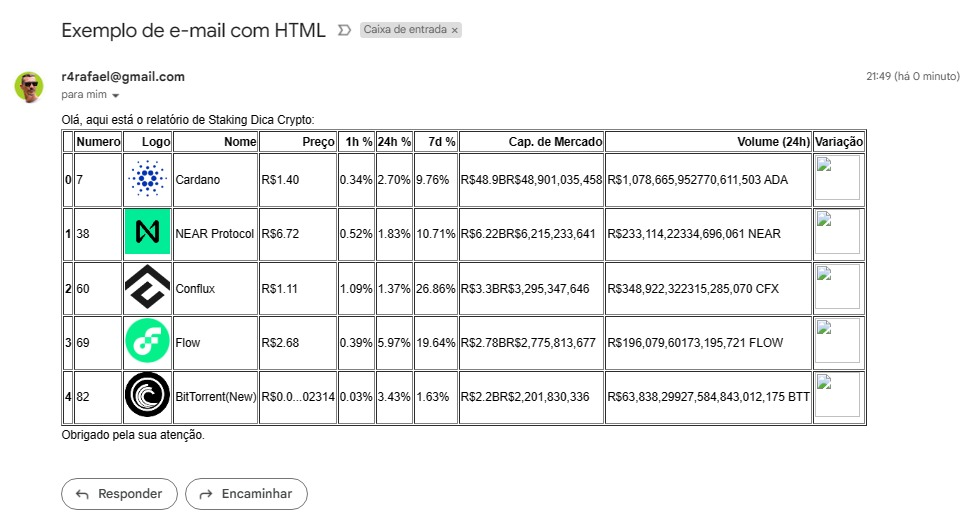

# Tabela Final editada

![email](email2.jpg)